
# Project: No-show appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">references</a></li>
</ul>

<a id='intro'></a>
## Introduction
This investigation 
makes use of 4 major variables: Age, Gender, No-show and the Diabetes to make analysis. This analysis can be employed in the health and educational organizations in policy making and crucial brand strategies.


### Dataset Description  
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 
Below are the14 variables and their description:

01 - PatientId.*Identification of a patient*  
02 - AppointmentIDPatientId : *Identification of each appointment*  
03 - Gender *Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.*

04 - DataMarcacaoConsult *The day of the actuall appointment, when they have to visit the doctor.*  
05 - DataAgendamento *The day someone called or registered the appointment, this is before appointment of course.*  
06 - Age *How old is the patient.*  
07 - Neighbourhood *Where the appointment takes place.*  
08 - Scholarship *True of False*  
09 - Hypertension *True or False*  
10 - Diabetes *True or False*  
11 - Alcoholism *True or False*   
12 - Handcap *True or False*  
13 - SMS_received *1 or more messages sent to the patient.*  
14 - No-show *True or False. This columns shows if the patient showed up for the appointment or not*


### Question(s) for Analysis  
**How many students between the age 19-40 yrs show up for appointments?**  
**Which gender show-up most for appointments?**  
**How many diabetic patient show up for appointmentss?**



In [2]:
#this cell imports the necessary packages needed for investigating this dataset, it also includes the magic line that relates to matplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#the magic line - matplot inline is needed to activate the interactive spot of matplot
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

In this section, the necessary data will be loaded, gathered, and checked for any errors. The session is crucial in investigating our dataset, because a minor overlooked error can affect the result.


In [3]:
# this code loads dataset and also shows the data set
pdno = pd.read_csv('noshowappointments.csv')

print(pdno)



           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

In [4]:
#this cell defines functions which would be used during the investigation of this dataset

#this function takes the argument of a variable, and outputs the value_counts of that variable
def var_count(x):
    return pdno[x].value_counts()

#this function outputs the first 5 rows of the datatset
def HD():
   return pdno.head()

#this function outputs the description of the dataset
def DSC():
   return pdno.describe()

### The info about the dataset
This to check if there is an empty data in any column. There are 110527 entries from 0 to 110527. In all the columns there are no empty data

In [5]:
#To check for empty data and info the dataset
pdno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#to check the first 5 data of the dataset
HD()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#this is to check the maximum, minimum, mean, average values of variables using the function DSC()
DSC()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This is to derive more information about each column, the mean, the maximum and the minimum values using the Describe function.  
This code cell also checks for any unseen error. From the code, the maximum age is 115, the youngest person is -1(which is an error that would be corrected shortly). 

In [8]:
#there are no duplicated values
sum(pdno.duplicated())

0

### Duplicated values
 This code cell checks for any duplicated values.  From the result, there is no duplicated values/data

In [9]:
#this file ensures 
pdno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<a id='cleaning'></a>
# Data Cleaning

This is an essential part of this investigation, as some errors which were detected during wrangling will be cleaned. These errors are:  
<li>Some column names have wrong spellings.</li> 
<li>The age variable has an error with -1.</li>

In [10]:
#this is to check the maximum, minimum, mean, average values of variables using the function DSC()
DSC()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
#this cell corrects the column names, hipertension and Handcap
pdno.rename(columns={'hipertension': 'hypertension', 'handcap' : 'handicap'}, inplace = True)

In [12]:
#this is to check the full data of the patient with -1 Age
pdno[pdno['Age'] == pdno.min()['Age']]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
#this cell replaces the age from -1 to 0year
pdno['Age'].replace([-1],0.0, inplace = True)

In [14]:
#this cell confirms that the error of the minimum age -1, has been corrected
DSC()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 How many students between the age 19-40 yrs show up for appointments?  
This research queries the number of students who show up for appointments. This query is important in the educational and medical organizations of society as it gives them data in making decisions. It also aids in policy making. For instance, A non-profit health organization can decide to make student-friendly policies that encourages health check-up


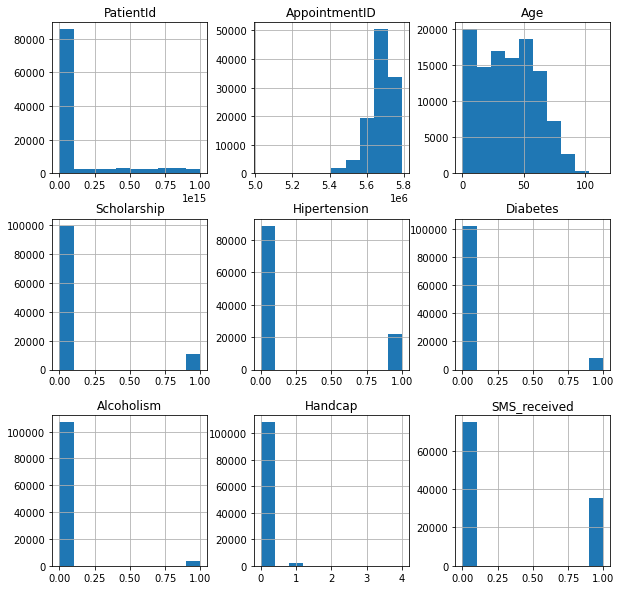

In [15]:
#this cell checks the distribution of the different variables
pdno.hist(figsize=(10,10));

From the above data:  
<li>les than 10% of patients are diabeticand handicapped.</li>  
<li>About 25% of patients are hypertensive.</li>  
<li>33% of patients receive a reminder

In [16]:
#this cell makes use of the var_count() function to group count the variable  'Age'
var_count('Age')

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [17]:
#this creates a new variable using the age variable and it also groups age into 5 groups
pdno['Age_data'] = pd.cut(pdno['Age'],[0, 2, 13, 19, 40, 115], labels =  ['Infant','kid','Teen','Young Adult', 'Adult'])
pdno['Age_data']

0               Adult
1               Adult
2               Adult
3                 kid
4               Adult
             ...     
110522          Adult
110523          Adult
110524    Young Adult
110525    Young Adult
110526          Adult
Name: Age_data, Length: 110527, dtype: category
Categories (5, object): ['Infant' < 'kid' < 'Teen' < 'Young Adult' < 'Adult']

In [18]:
#this cell groups the Age_data by the No-show option, what number of each group show-up for their appointment
pdn = pdno.groupby('Age_data')['No-show'].value_counts()
pdn

Age_data     No-show
Infant       No          3224
             Yes          667
kid          No         11405
             Yes         3304
Teen         No          6141
             Yes         2131
Young Adult  No         23291
             Yes         6981
Adult        No         41246
             Yes         8597
Name: No-show, dtype: int64

Text(0, 0.5, 'No-show')

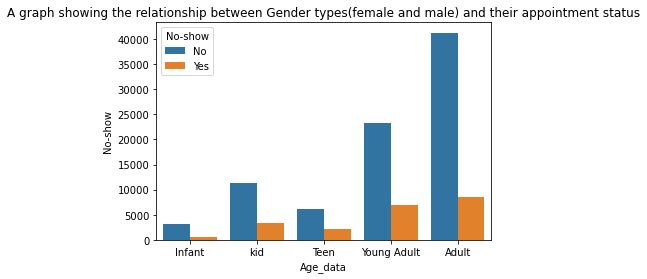

In [19]:
#this cell makes use of seaborn and .pyplotto group count the no of patients in the Age_data groups and compare it with how many of them 
#show up for appointment
sns.countplot(x = 'Age_data', hue = 'No-show', data = pdno)
plt.title('A graph showing the relationship between Gender types(female and male) and their appointment status')
plt.xlabel('Age_data')
plt.ylabel('No-show')

From the above cell, over 70% adults(40-120) do not show up for appointments

**No-show**  
Yes -- this means the patients showed up for appointment  
No-- this means the patients didn't show up for appointment

In [20]:
#this cell groups the age of patients according to their gender
pd.crosstab(pdno['Age_data'], pdno['Gender'])

Gender,F,M
Age_data,,
Infant,1845,2046
kid,7018,7691
Teen,5493,2779
Young Adult,21820,8452
Adult,33942,15901


### Research Question 2 Which gender show-up most for appointments?
This research question addresses the gender that shows up most for appointments. This is a necessary question for health organizations who would be making gender-specific decisions. This research question gives insight to the appointment show-up status of females and males. It also births strategies of sustaining firms and organizations. 

In [21]:
#this cell makes use of the function var_count() to output the count of female and male patients
var_count('Gender')

F    71840
M    38687
Name: Gender, dtype: int64

In [22]:
#this cell checks&groups the No of patients who show-up for appointments according to their gender
pd.crosstab(pdno['Gender'], pdno['No-show'])

No-show,No,Yes
Gender,,
F,57246,14594
M,30962,7725


Text(0, 0.5, 'No-show')

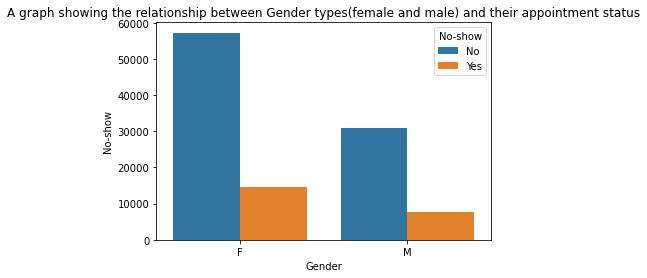

In [23]:
#this cell makes use of seaborn and .pyplot to plot and show the relationship between the Gender of patients who show-up and don't show-up
sns.countplot(x = 'Gender', hue = 'No-show', data = pdno)
plt.title('A graph showing the relationship between Gender types(female and male) and their appointment status')
plt.xlabel('Gender')
plt.ylabel('No-show')

From the above chart, above 75% of female do not show up for appointments, this is a poor result and while making decisions, this can be looked into.

### Research Question 3 How many diabetic patient show up for appointments?

Health organizations that specialize in diabetic solutions has a high chance of discovering better solutions using this data. This research question poses important startegies that can be employed. What solutions can be used for the 82% diabetic patients who do not show-up for appointments?

In [24]:
#loading and checking data based on the variable, Diabetes
pdno.query('Diabetes')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_data
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult


In [25]:
#this cell counts patients that are diabetic --0, and non-diabetic --1
var_count('Diabetes')

0    102584
1      7943
Name: Diabetes, dtype: int64

From the above cell, over 70% of patients are not Diabetic

In [26]:
#this cell groups patients according to their Diabetes status and their appointment presence status
pd.crosstab(pdno['Diabetes'], pdno['No-show'])

No-show,No,Yes
Diabetes,,
0,81695,20889
1,6513,1430


From this cell, over 75% of non-Diabetic patients show up for their appointments

Text(0, 0.5, 'No 0f Patients')

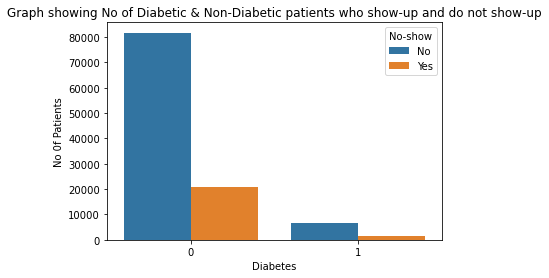

In [27]:
sns.countplot(x= 'Diabetes', hue = 'No-show', data = pdno)
plt.title('Graph showing No of Diabetic & Non-Diabetic patients who show-up and do not show-up')
plt.xlabel('Diabetes')
plt.ylabel('No 0f Patients')

The chart above shows the relationship between patients with/without diabetes and the number of them that show up  
0 -- means Non-diabetic  
1 -- means diabetic  

From the chart above, 25% of non-diabetic people show up for appointment

<a id='conclusions'></a>
# Conclusions

From the investigation carried out above, the following insights can be drawn from this data  
**Research 1**
<li>17% of Adult between the age of 40-120yrs, show-up for appointments. This is very low considering the total amounts.</li>
<li>.74% of Teens(13-19) do not show-up for appointments. This can be looked into, the reason why they don't show-up.</li>
<li>This figures show that the number of males who schedule appointments is half the number of females who schedule appointmnets</li>

**Research 2**
<li>20% of females show up for appointments while 24% of males show up. Although the no of females who book appointment are 40%more than the males</li>
<li>The proportion of males to females who schedule for appointment is 2:1. From this data, government parastatals can make policies centered around encouraging more men</li>


**Research 3**
<li>82% of Diabetic patients do not show-up for appointmnets. This number is very low and strategies should be put in place to encourage these people to show-up. For instance, more self-care solutions can be innovated, more online appointments can be introduced to meet the schedule of these patients.</li>
<li>For the 18% who show up for appointments, solutions like incentives, discounts can be introduced for them. This will encourage them and the 82% who do not show up</li>



<a id='limitations'></a>
# Limitations  
<li>There was an error with the age.</li>  
<li>Some column names were wrongly spelt</li>
<li>This data does not give the names of the patient, as this could identify patients of same family. As cultural and family background could be a factor why some patients do not show up for appointments</li>




<a id='references'></a>
# References  
[markdown explanation](https://daringfireball.net/projects/markdown/syntax#em)  
[Kaggle dataset source](https://www.kaggle.com/datasets/joniarroba/noshowappointments)  
[Stackoverflow guides](https://stackoverflow.com/questions/63677950/attributeerror-module-matplotlib-has-no-attribute-xlabel)  
[Seaborn Countplot Explanation](https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/)  
[Pandas Rename Explanation](https://note.nkmk.me/en/python-pandas-dataframe-rename/#:~:text=You%20can%20use%20the%20rename,change%20column%2Findex%20name%20individually.&text=Specify%20the%20original%20name%20and,is%20for%20the%20index%20name)  
[Matplob.pyplot Error Explanation - Stackoverflow](https://stackoverflow.com/questions/63677950/attributeerror-module-matplotlib-has-no-attribute-xlabel)  
[Pandas Replace Explanation -- DatatoFish](https://datatofish.com/replace-values-pandas-dataframe/)
